# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Arya Ulya Krisna
- **Email:** aryaulyakrisna@gmail.com
- **ID Dicoding:** aryaulyakrisna

## Menentukan Pertanyaan Bisnis

1. Apakah terdapat perbedaan yang signifikan dalam jumlah penyewaan sepeda antara hari kerja dan hari libur pada musim tertentu?
2. Faktor apa saja yang paling memengaruhi jumlah penyewaan sepeda setiap harinya?
3. Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda pada jam sibuk?
4. Bagaimana perbandingan jumlah penyewa sepeda pada tahun 2011 sengan tahun 2012?

## Import Semua Packages/Library yang Digunakan

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

## Data Wrangling

### Gathering Data

In [7]:
data_path = "./data/"

#### Mengimpor day.csv

In [8]:
day_df = pd.read_csv(data_path+"day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Mengimpor hour.csv

In [9]:
hour_df = pd.read_csv(data_path+"hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day.csv memiliki 16 fitur termasuk tanggal (dteday), kondisi cuaca (weathersit), suhu (temp), kelembapan (hum), kecepatan angin (windspeed), dan jumlah penyewaan (cnt). 
- hour.csv memiliki 17 fitur, sama seperti day.csv dengan tambahan kolom jam (hr).

### Assessing Data

#### Menilai day.csv

In [10]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
day_df.info()
print("\nDuplicated data:", day_df.duplicated().sum())
print("Missing data:", day_df.isna().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Duplicated data: 0
Missing data: 0


#### Melihat potensi outlier pada kolom windspeed, casual, registered, dan cnt

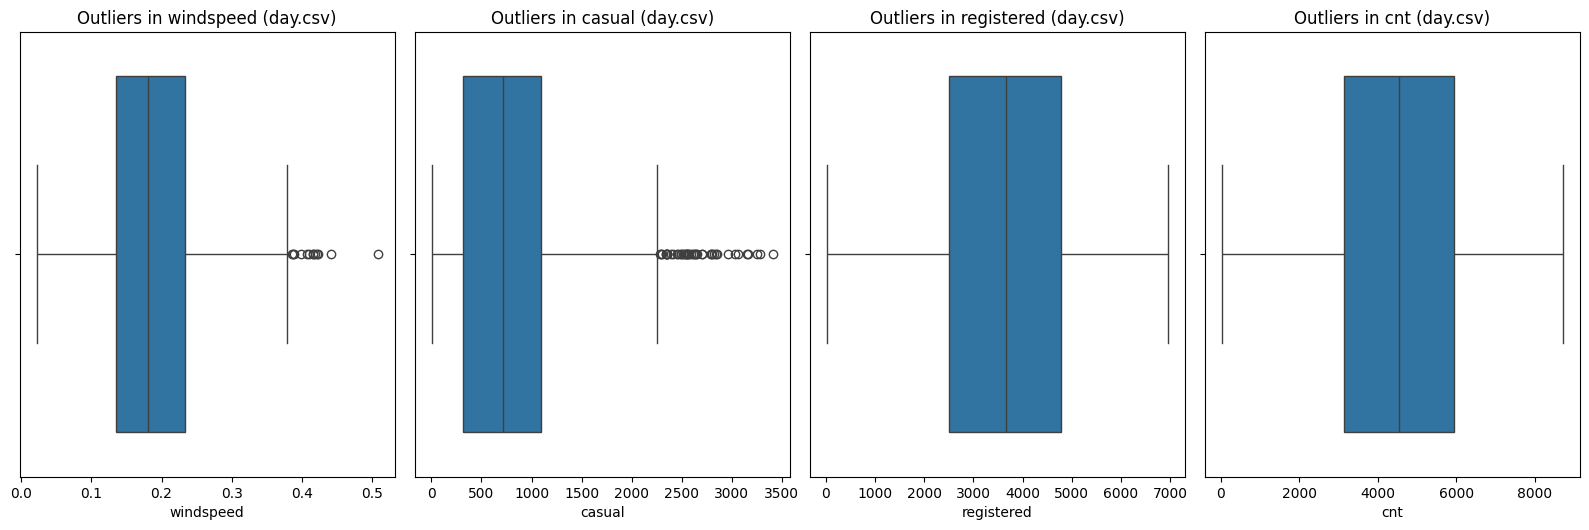

In [12]:
outlier_cols = ['windspeed', 'casual', 'registered', 'cnt']

plt.figure(figsize=(16, 10))
for i, col in enumerate(outlier_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=day_df[col])
    plt.title(f'Outliers in {col} (day.csv)')
plt.tight_layout()
plt.show()

In [13]:
for i in outlier_cols:
    Q1 = day_df[i].quantile(0.25)
    Q3 = day_df[i].quantile(0.75)
    IQR = Q3 - Q1
    maximum = Q3 + (1.5 * IQR)
    minimum = Q1 - (1.5 * IQR)
    
    outliers_before = ((day_df[i] > maximum) | (day_df[i] < minimum)).sum()
    print(f"Outlier pada kolom {i}: {outliers_before}")

Outlier pada kolom windspeed: 13
Outlier pada kolom casual: 44
Outlier pada kolom registered: 0
Outlier pada kolom cnt: 0


#### Menilai hour.csv

In [14]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [15]:
hour_df.info()
print("\nDuplicated data:", hour_df.duplicated().sum())
print("Missing data:", hour_df.isna().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

Duplicated data: 0
Missing data: 0


#### Melihat potensi outlier pada kolom windspeed, casual, registered, dan cnt

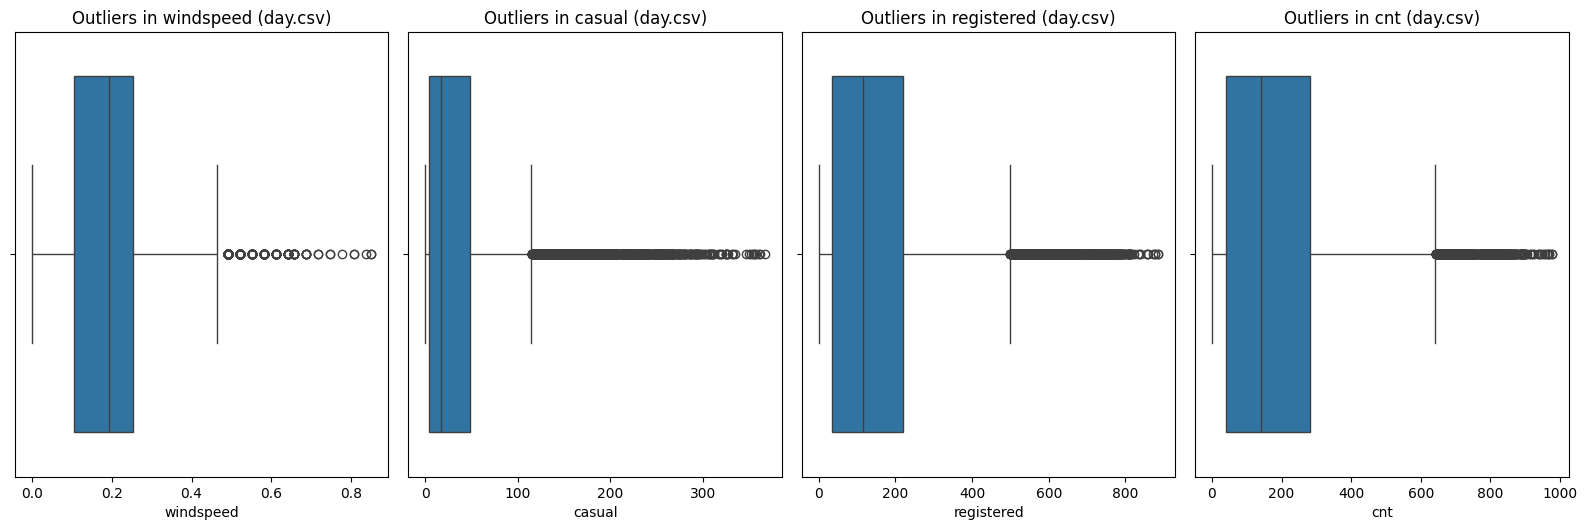

In [16]:
outlier_cols = ['windspeed', 'casual', 'registered', 'cnt']

plt.figure(figsize=(16, 10))
for i, col in enumerate(outlier_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=hour_df[col])
    plt.title(f'Outliers in {col} (day.csv)')
plt.tight_layout()
plt.show()

In [17]:
for i in outlier_cols:
    Q1 = hour_df[i].quantile(0.25)
    Q3 = hour_df[i].quantile(0.75)
    IQR = Q3 - Q1
    maximum = Q3 + (1.5 * IQR)
    minimum = Q1 - (1.5 * IQR)
    
    outliers_before = ((hour_df[i] > maximum) | (hour_df[i] < minimum)).sum()
    print(f"Outlier pada kolom {i} sebelum: {outliers_before}")

Outlier pada kolom windspeed sebelum: 342
Outlier pada kolom casual sebelum: 1192
Outlier pada kolom registered sebelum: 680
Outlier pada kolom cnt sebelum: 505


**Insight:**
- day.csv tidak memiliki data yang hilang dan data rangkap atau duplikasi
- hour.csv tidak memiliki data yang hilang dan data rangkap atau duplikasi
- day.csv memiliki outlier yang terlihat pada kolom windspeed dan casual
- hour.csv memiliki outlier yang terlihat pada kolom windspeed, casual, registered, dan cnt

### Cleaning Data

#### Mengganti outlier pada day_df dengan boundery value

In [18]:
outlier_cols = ['windspeed', 'casual', 'registered', 'cnt']

for i in outlier_cols:
    Q1 = day_df[i].quantile(0.25)
    Q3 = day_df[i].quantile(0.75)
    IQR = Q3 - Q1
    
    maximum = Q3 + (1.5 * IQR)
    minimum = Q1 - (1.5 * IQR)
    
    day_df[i] = day_df[i].mask(day_df[i] > maximum, maximum)
    day_df[i] = day_df[i].mask(day_df[i] < minimum, minimum)

day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.189846,824.388509,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.075644,623.642956,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.380611,2266.750000,6946.000000,8714.000000


In [19]:
for i in outlier_cols:
    Q1 = day_df[i].quantile(0.25)
    Q3 = day_df[i].quantile(0.75)
    IQR = Q3 - Q1
    maximum = Q3 + (1.5 * IQR)
    minimum = Q1 - (1.5 * IQR)
    
    outliers_before = ((day_df[i] > maximum) | (day_df[i] < minimum)).sum()
    print(f"Outlier pada kolom {i} sebelum: {outliers_before}")

Outlier pada kolom windspeed sebelum: 0
Outlier pada kolom casual sebelum: 0
Outlier pada kolom registered sebelum: 0
Outlier pada kolom cnt sebelum: 0


#### Memperbaiki penamaan kolom

In [20]:
day_df.rename(columns={
    'dteday' : 'date',
    'yr' : 'year',
    'mnth' : 'month',
    'weathersit' : 'weather',
    'cnt' : 'total',
    'temp' : 'temperature',
    'atemp' : 'atemperature',
    'hum' : 'humidity',
}, inplace=True)

day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temperature,atemperature,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518,1600


#### Memperbaiki format date dan kategori pada kolom - kolom

In [21]:
season = {
    1: 'Spring', 
    2: 'Summer',
    3: 'Fall', 
    4: 'Winter',
}
year = {0: 2011, 1: 2012}
month = {
    1: 'Jan', 
    2: 'Feb', 
    3: 'Mar',
    4: 'Apr', 
    5: 'May', 
    6: 'Jun',
    7: 'Jul', 
    8: 'Aug', 
    9: 'Sep',
    10: 'Oct', 
    11: 'Nov', 
    12: 'Dec',   
}
weather = {
    1: 'Clear', 
    2: 'Mist',
    3: 'Rainy/Snowy', 
    4: 'Heavy/Storm',
}
holiday = {
  0: False,
  1: True,
}
weekday = {
  0: "Sun",
  1: "Mon",
  2: "Tue",
  3: "Wed",
  4: "Thu",
  5: "Fri",
  6: "Sat",
}
workingday = {
  0: False,
  1: True,
}


In [22]:
day_df["date"] = pd.to_datetime(day_df["date"])

day_df['season'] = day_df['season'].map(season)
day_df['year'] = day_df['year'].map(year)
day_df['month'] = day_df['month'].map(month)
day_df['weather'] = day_df['weather'].map(weather)
day_df['holiday'] = day_df['holiday'].map(holiday)
day_df['weekday'] = day_df['weekday'].map(weekday)
day_df['workingday'] = day_df['workingday'].map(workingday)
day_df['casual'] = day_df['casual'].astype(int)


day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temperature,atemperature,humidity,windspeed,casual,registered,total
0,1,2011-01-01,Spring,2011,Jan,False,Sat,False,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,False,Sun,False,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,False,Mon,True,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,False,Tue,True,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,False,Wed,True,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Mengganti outlier pada hour_df dengan boundery value

In [23]:
outlier_cols = ['windspeed', 'casual', 'registered', 'cnt']

for i in outlier_cols:
    Q1 = hour_df[i].quantile(0.25)
    Q3 = hour_df[i].quantile(0.75)
    IQR = Q3 - Q1
    
    maximum = Q3 + (1.5 * IQR)
    minimum = Q1 - (1.5 * IQR)
    
    hour_df[i] = hour_df[i].mask(hour_df[i] > maximum, maximum)
    hour_df[i] = hour_df[i].mask(hour_df[i] < minimum, minimum)

hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.188691,31.158812,148.645204,186.361327
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.118197,34.813147,135.351791,171.931168
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.477500,114.000000,499.000000,642.500000


In [24]:
for i in outlier_cols:
    Q1 = hour_df[i].quantile(0.25)
    Q3 = hour_df[i].quantile(0.75)
    IQR = Q3 - Q1
    maximum = Q3 + (1.5 * IQR)
    minimum = Q1 - (1.5 * IQR)
    
    outliers_before = ((hour_df[i] > maximum) | (hour_df[i] < minimum)).sum()
    print(f"Outlier pada kolom {i} sebelum: {outliers_before}")

Outlier pada kolom windspeed sebelum: 0
Outlier pada kolom casual sebelum: 0
Outlier pada kolom registered sebelum: 0
Outlier pada kolom cnt sebelum: 0


#### Memperbaiki penamaan kolom

In [25]:
hour_df.rename(columns={
    'dteday' : 'date',
    'yr' : 'year',
    'mnth' : 'month',
    'hr' : 'hour',
    'weathersit' : 'weather',
    'cnt' : 'total',
    'temp' : 'temperature',
    'atemp' : 'atemperature',
    'hum' : 'humidity',
}, inplace=True)

hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temperature,atemperature,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1.0


#### Memperbaiki format date dan kategori pada kolom season, year, month, dan weekday

In [26]:
hour_df["date"] = pd.to_datetime(hour_df["date"])

hour_df['season'] = hour_df['season'].map(season)
hour_df['year'] = hour_df['year'].map(year)
hour_df['month'] = hour_df['month'].map(month)
hour_df['weather'] = hour_df['weather'].map(weather)
hour_df['holiday'] = hour_df['holiday'].map(holiday)
hour_df['weekday'] = hour_df['weekday'].map(weekday)
hour_df['workingday'] = hour_df['workingday'].map(workingday)
hour_df['casual'] = hour_df['casual'].astype(int)
hour_df['total'] = hour_df['total'].astype(int)

hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temperature,atemperature,humidity,windspeed,casual,registered,total
0,1,2011-01-01,Spring,2011,Jan,0,False,Sat,False,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,False,Sat,False,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,False,Sat,False,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,False,Sat,False,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,False,Sat,False,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Seluruh outlier diubah menjadi boundery value dari dataframe
- Format dari seluruh kolom telah diubah menjadi mudah dimengerti

## Exploratory Data Analysis (EDA)

### Eksplorasi data_df

#### Membuat pivot tabel penyewaan sepeda berdasarkan hari

In [27]:
hour_df.groupby(['weekday', 'workingday']).agg({
    "total": ["max", "min", "mean", "sum", "std"]
}).sort_values(by=("total", "mean"), ascending=False)

total                                    
                     max min        mean     sum         std
weekday workingday                                          
Wed     False        584  16  308.458333    7403  202.209100
Fri     True         642   1  194.701927  474878  167.083151
Thu     True         642   1  193.799009  469575  174.404298
Sat     False        642   1  189.078822  474966  176.722671
Tue     True         642   1  188.169959  457253  174.834117
Wed     True         642   1  184.848633  453064  174.980203
Mon     True         642   1  182.665881  387617  170.050626
Sun     False        642   1  176.993205  442837  166.750874
Mon     False        642   1  166.669468   59501  161.558761
Fri     False        331   3  135.291667    6494   95.655846
Thu     False        269   2   81.666667    3920   77.569278
Tue     False        126   1   44.043478    1013   41.126720

- Memberikan gambaran jumlah penyewa sepeda setiap harinya

#### Membuat pivot penyewaan sepeda pada masing - masing musim di hari kerja dan hari libur

In [28]:
day_df.groupby(['season', 'holiday']).agg({
    "total": ["max", "min", "mean", "sum", "std"]
})

total                                         
                 max   min         mean      sum          std
season holiday                                               
Fall   False    8714  1115  5642.923913  1038298  1459.539528
       True     7403  3351  5707.750000    22831  1697.741122
Spring False    7836   431  2640.994253   459533  1407.526332
       True     3129  1000  1687.857143    11815   808.488390
Summer False    8362   795  4994.177778   898952  1702.913190
       True     6370  3126  4909.250000    19637  1555.344201
Winter False    8555    22  4752.680233   817461  1693.640543
       True     6269  1495  4025.333333    24152  1883.175899

- Di musim gugur dan panas, penyewaan meningkat saat hari libur.
- Sebaliknya, di musim semi dan dingin, penyewaan justru menurun saat hari libur.

#### Membuat pivot tabel korelasi faktor - faktor tertentu yang mungkin mempengaruhi penyewaan sepeda

In [29]:
day_df[['temperature', 'atemperature', 'humidity', 'windspeed']].corr()

,temperature,atemperature,humidity,windspeed
temperature,1.000000,0.991702,0.126963,-0.156916
atemperature,0.991702,1.000000,0.139988,-0.182948
humidity,0.126963,0.139988,1.000000,-0.241564
windspeed,-0.156916,-0.182948,-0.241564,1.000000


- Faktor suhu memiliki pengaruh terbesar terhadap peningkatan penyewaan sepeda.

#### Membuat pivot tabel jumlah penyewa sepeda perbulan

In [30]:
day_df.groupby(['year', 'month'])['total'].mean().reset_index()

,year,month,total
0,2011,Apr,3162.333333
1,2011,Aug,4409.387097
2,2011,Dec,2816.870968
3,2011,Feb,1721.964286
4,2011,Jan,1231.903226
5,2011,Jul,4559.387097
6,2011,Jun,4783.733333
7,2011,Mar,2065.967742
8,2011,May,4381.322581
9,2011,Nov,3405.566667


- Diketahui jumlah penyewa sepeda tiap bulan pada tahun 2011 dan 2012
- Jumlah penyewa terbesar berada pada bulan september tahun 2012

### Ekplorasi hour_df

#### Membuat pivot tabel penyewaan sepeda berdasarkan jam

In [31]:
hour_df.groupby(['hour', 'workingday']).agg({
    "total": ["max", "min", "mean", "sum", "std"]
}).sort_values(by=("total", "mean"), ascending=False)

total                                    
                  max min        mean     sum         std
hour workingday                                          
17   True         642  26  478.725451  238884  172.607649
8    True         642  31  459.360887  227843  163.256608
18   True         642  26  456.845382  227509  174.019872
13   False        642  30  368.298701   85077  170.232250
12   False        642  32  362.584416   83757  168.102274
14   False        642  23  361.974026   83616  167.351905
15   False        642   7  356.082251   82255  163.832595
16   False        642  11  350.497835   80965  167.258739
19   True         642  18  347.586345  173098  158.851922
17   False        642  15  321.662338   74304  170.181152
11   False        642  27  315.203463   72812  155.006163
16   True         634  13  293.122244  146268  132.798845
7    True         596  18  290.612903  144144  134.558250
18   False        642  23  280.895652   64606  155.415509
10   False        539  12  255.909091   59115  127.844251
20   True         567  23  249.718876  124360  120.340635
9    True         426  23  241.518145  119793   85.705861
19   False        554  11  231.673913   53285  130.688879
15   True         601  13  201.331325  100263   97.639817
12   True         471   3  200.820926   99808   89.264976
13   True         428  11  198.429719   98818   88.476850
21   True         398   6  186.287149   92771   87.831120
14   True         642  12  183.554217   91410   87.160887
20   False        551  11  174.739130   40190  100.854609
9    False        397  14  171.623377   39645   92.515104
11   True         361  10  158.229839   78482   69.173911
21   False        584   7  142.060870   32674   86.649299
22   True         321  11  138.389558   68918   67.549347
10   True         275   8  135.366935   67142   55.679335
22   False        502   9  116.060870   26694   72.682811
8    False        597   5  105.653680   24406   74.338249
6    True         213   7  102.500000   50840   45.812662
0    False        249   6   90.800000   20884   48.692727
23   True         256   9   88.708835   44177   48.857465
     False        239   2   85.930435   19764   54.971644
1    False        168   4   69.508696   15987   36.549152
2    False        132   2   53.171053   12123   27.852691
7    False        387   1   43.406926   10027   37.794625
0    True         283   2   36.786290   18246   24.467143
3    False         79   2   25.775330    5851   14.893062
5    True          66   1   24.913131   12332   12.281389
6    False        133   1   18.742358    4292   16.064535
1    True         114   1   16.552632    8177   11.680338
5    False         55   1    8.689189    1929    6.698941
2    True          74   1    8.683778    4229    6.563915
4    False         28   1    8.264317    1876    5.207271
     True          17   1    5.429787    2552    3.129468
3    True          36   1    4.942553    2323    3.403074

- Memberikan gambaran jumlah penyewa sepeda tiap jamnya

#### Membuat pivot data penyewa di jam sibuk pada kondisi cuaca yang berbeda

In [32]:
# Memfilter data untuk jam sibuk (7–9 pagi dan 17–19 sore)
rush_hours = hour_df[(hour_df['hour'] >= 7) & (hour_df['hour'] <= 9) | (hour_df['hour'] >= 17) & (hour_df['hour'] <= 19)]
rush_hours.groupby('weather').agg({
    "total": ["max", "min", "mean", "sum", "std"]
}).fillna(0)

total                                     
              max  min        mean     sum         std
weather                                               
Clear         642    2  341.823550  966677  192.812864
Heavy/Storm   164  164  164.000000     164    0.000000
Mist          642    1  306.691840  353309  178.217142
Rainy/Snowy   642    1  200.502591   77394  161.645937

In [33]:
print(rush_hours['weather'].value_counts())

weather
Clear          2828
Mist           1152
Rainy/Snowy     386
Heavy/Storm       1
Name: count, dtype: int64


- Cuaca cerah memiliki pengaruh paling positif terhadap jumlah penyewaan sepeda pada jam sibuk, diikuti oleh kabut ringan. Sebaliknya, kondisi hujan, badai, dan salju secara signifikan mengurangi minat penyewaan.
- Jumlah data (Heavy/Storm) terlalu sedikit menyebabkan standar deviasi tidak dapat ditemukan

## Visualization & Explanatory Analysis

### Pertanyaan 1:

- Apakah terdapat perbedaan yang signifikan dalam jumlah penyewaan sepeda antara hari kerja dan hari libur pada musim tertentu?

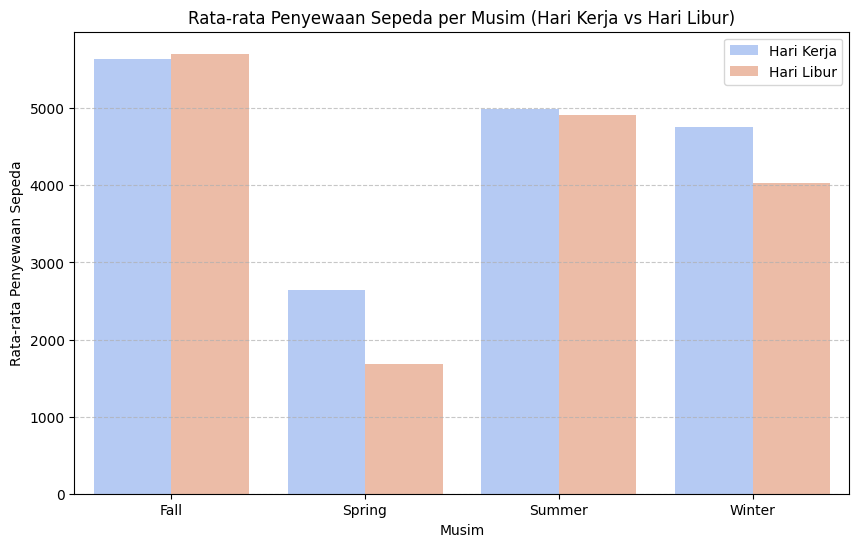

In [34]:
plt.figure(figsize=(10, 6))

data = day_df.groupby(['season', 'holiday']).agg({
    "total": ["mean"]
}).reset_index()

data.columns = ['season', 'holiday', 'mean']

sns.barplot(data=data, x='season', y='mean', hue='holiday', palette='coolwarm')
plt.title('Rata-rata Penyewaan Sepeda per Musim (Hari Kerja vs Hari Libur)')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan Sepeda')
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Hari Kerja', 'Hari Libur'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Pertanyaan 2:
- Faktor apa saja yang paling memengaruhi jumlah penyewaan sepeda setiap harinya?

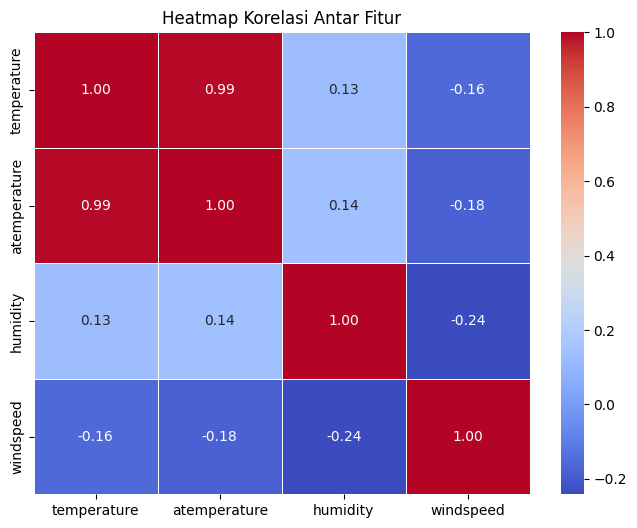

In [35]:
corr = day_df[['temperature', 'atemperature', 'humidity', 'windspeed']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

### Pertanyaan 3:
- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda pada jam sibuk?

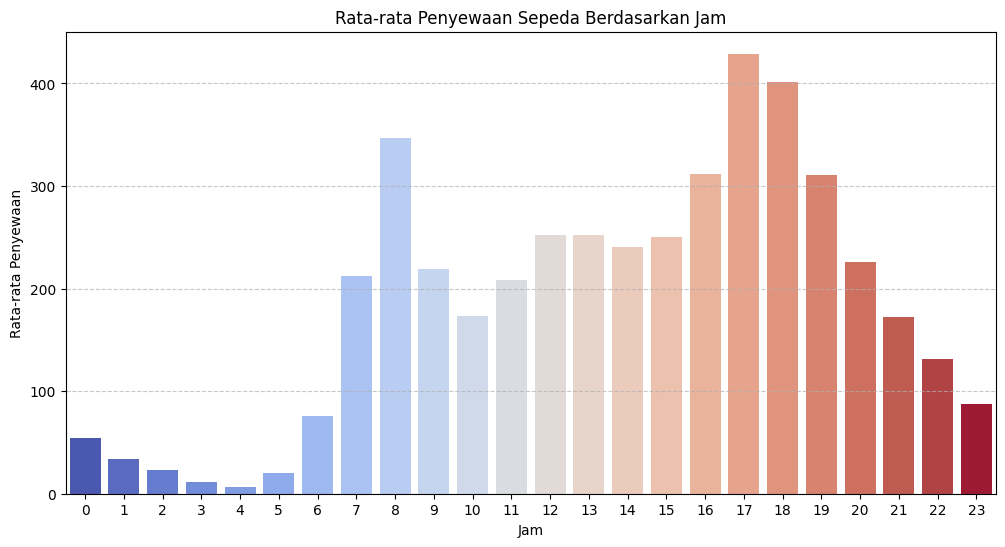

In [36]:
mean_rentals_per_hour = hour_df.groupby('hour')['total'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='total', data=mean_rentals_per_hour, hue='hour', palette='coolwarm', legend=False)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(0, 24)) 
plt.show()

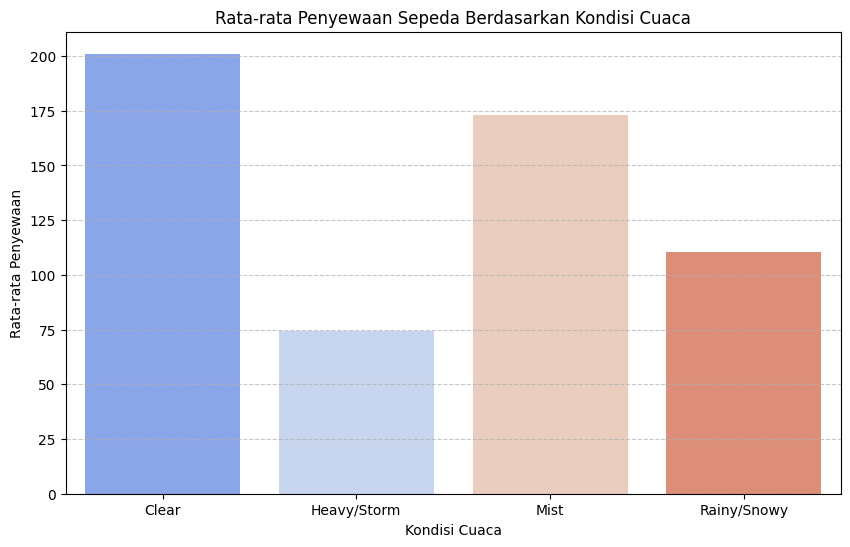

In [37]:
mean_rentals_per_weather = hour_df.groupby('weather')['total'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='weather', y='total', data=mean_rentals_per_weather, hue='weather', palette="coolwarm", dodge=False, legend=False)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

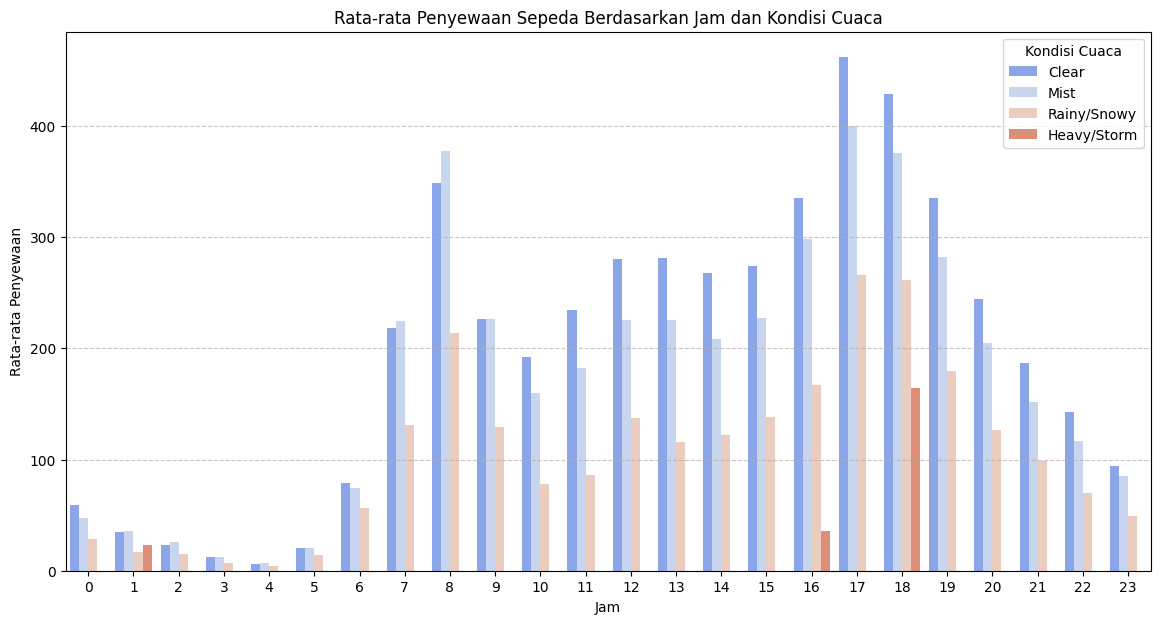

In [38]:
mean_rentals_per_hour_weather = hour_df.groupby(['hour', 'weather'])['total'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='hour', y='total', hue='weather', data=mean_rentals_per_hour_weather, palette='coolwarm')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jam dan Kondisi Cuaca')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Kondisi Cuaca')
plt.show()

### Pertanyaan 4:
- Bagaimana perbandingan jumlah penyewa sepeda pada tahun 2011 sengan tahun 2012?

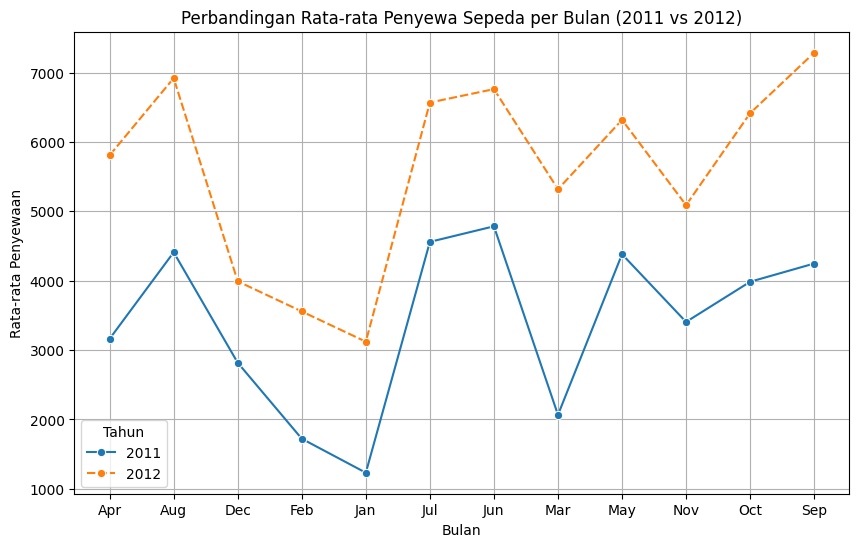

In [39]:
monthly_rentals = day_df.groupby(['year', 'month'])['total'].mean().reset_index()
pivot_rentals = monthly_rentals.pivot(index='month', columns='year', values='total')

plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_rentals, marker='o')
plt.title('Perbandingan Rata-rata Penyewa Sepeda per Bulan (2011 vs 2012)')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penyewaan')
plt.grid(True)
plt.legend(title='Tahun')
plt.show()

### Conclusion:
1. Terdapat perbedaan pengguna sepeda di hari libur dan hari kerja tiap musimnya, tapi jumlahnya tidak signifikan. Comtohnya dapat dilihat pada musim semi (Springer) yang memiliki jarak cukup jelas antara jumlah penyewa pada hari libur dan hari kerja tetapi, pada musim yanng lain dapat dilihat bahwa jaraknya sangat sedikit.
2. Jumlah penyewaan sepeda setiap harinya besar dipengaruhi oleh temperatur yang dirasakan oleh penyewa seperti yang terlihat pada heatmap korelasi antar fitur.
3. Cuaca cerah memiliki pengaruh paling positif terhadap jumlah penyewaan sepeda pada jam sibuk, diikuti oleh kabut ringan. Sebaliknya, kondisi hujan, badai, dan salju secara signifikan mengurangi minat penyewaan.
4. Jumlah penyewa sepeda pada tahun 2011 dan 2012 terlihat cukup signifikan dengan tahun 2012 memiliki penyewa sepeda yang lebih banyak di masing - masing bulannya dibanding tahun 2011.

### Ekspor data hasil cleaning

In [40]:
day_df.to_csv("main_day_data.csv", index=False)
hour_df.to_csv("main_hour_data.csv", index=False)

## Time Series Analysis

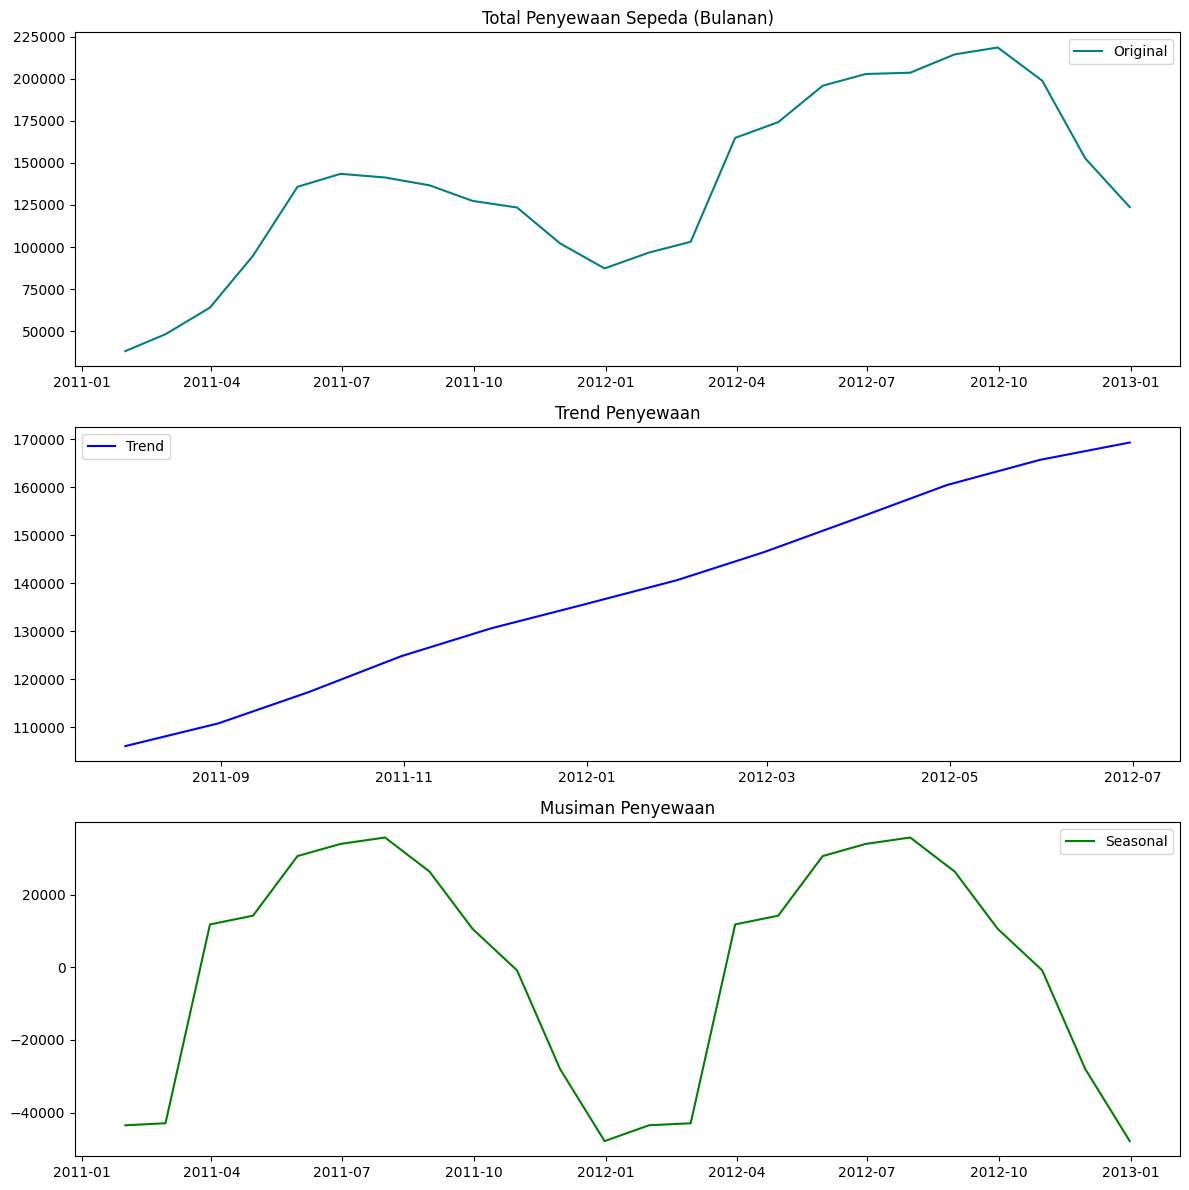

<Figure size 1000x600 with 0 Axes>

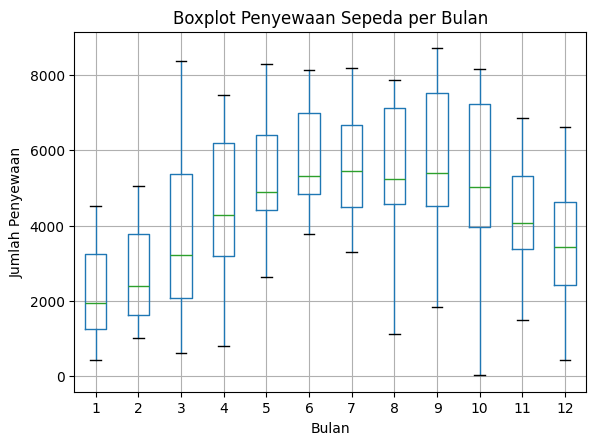

In [41]:
day_df.set_index('date', inplace=True)

monthly_rentals = day_df['total'].resample('ME').sum()

decompose_result = seasonal_decompose(monthly_rentals, model='additive')

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))

ax1.plot(monthly_rentals, label='Original', color='teal')
ax1.set_title('Total Penyewaan Sepeda (Bulanan)')
ax1.legend()

ax2.plot(decompose_result.trend, label='Trend', color='blue')
ax2.set_title('Trend Penyewaan')
ax2.legend()

ax3.plot(decompose_result.seasonal, label='Seasonal', color='green')
ax3.set_title('Musiman Penyewaan')
ax3.legend()

plt.tight_layout()
plt.show()

day_df['month'] = day_df.index.month
plt.figure(figsize=(10, 6))
day_df.boxplot(column='total', by='month')
plt.title('Boxplot Penyewaan Sepeda per Bulan')
plt.suptitle('')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.show()


## Conclusion

- **Pola Total Penyewaan Bulanan:** Total penyewaan sepeda menunjukkan pertumbuhan signifikan dari sekitar 40.000 di awal 2011 hingga mencapai puncak sekitar 220.000 pada Oktober 2012.
- **Komponen Trend:** Trend penyewaan sepeda menunjukkan peningkatan yang konsisten dan positif.
- **Komponen Musiman:** Pola musiman memperlihatkan perubahan berulang dengan puncak pada bulan-bulan pertengahan tahun dan titik terendah pada bulan-bulan awal tahun.
- **Boxplot Bulanan:** Boxplot menunjukkan penyewaan tertinggi konsisten terjadi pada bulan-bulan musim panas dan gugur (Juni-September) sedangkan terendah pada bulan-bulan musim dingin.